In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTSearch import what_is_it

from IPython.display import Image, display

pictures_dir = "pictures/cat/"
parser = load_parser()

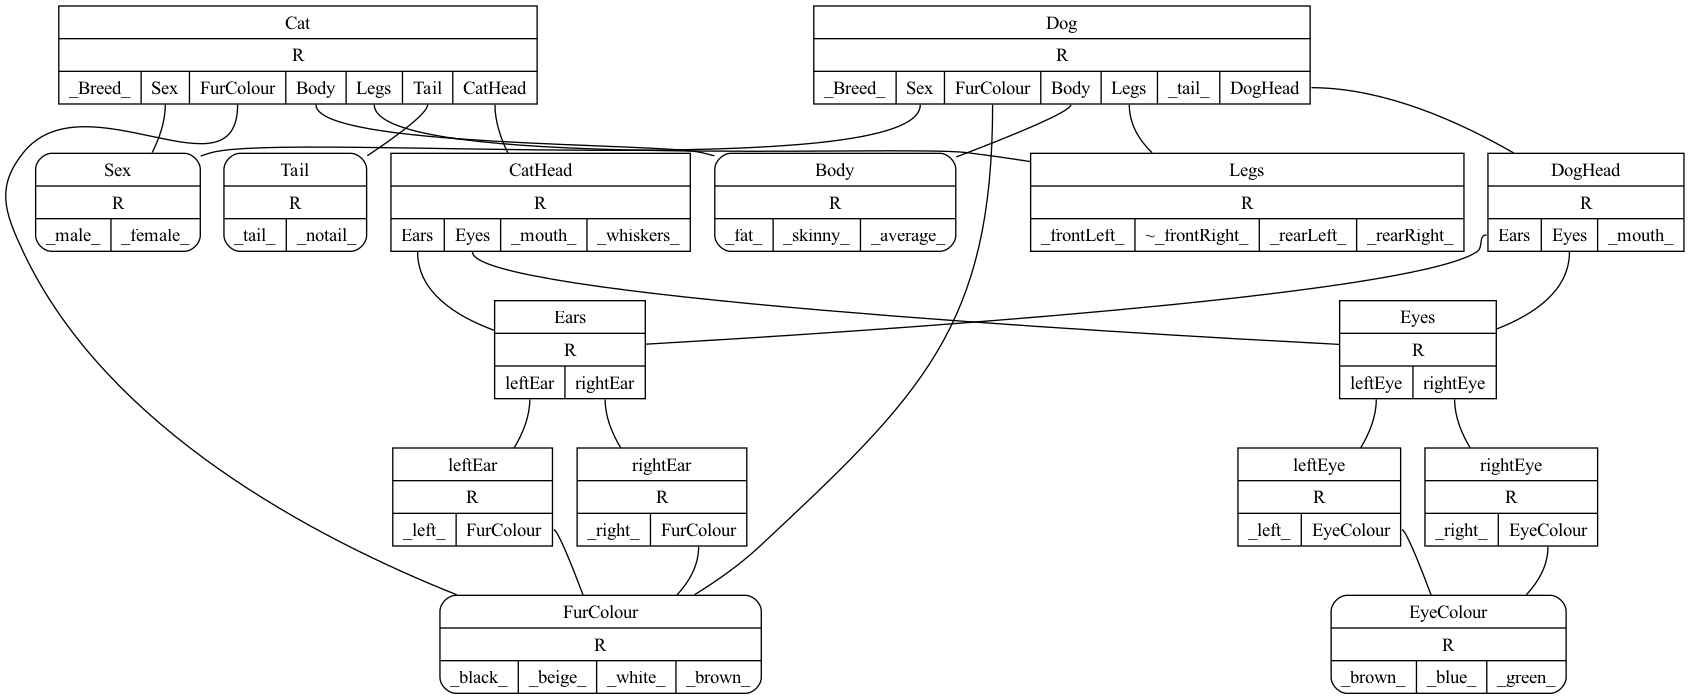

In [2]:
cat_hn = Hypernetwork()

compile_hn(cat_hn, parser, """
    Cat=<%Breed, Sex, FurColour, Body, Legs, Tail={%tail, %notail; R}, CatHead; R>
    Dog=<%Breed, Sex, FurColour, Body, Legs, %tail, DogHead; R>

    FurColour={%black, %beige, %white, %brown; R}
    EyeColour={%brown, %blue, %green; R}
    Body={%fat, %skinny, %average; R}
    CatHead=<Ears, Eyes, %mouth, %whiskers; R>
    DogHead=<Ears, Eyes, %mouth; R>
    Ears=<leftEar=<%left, FurColour; R>, rightEar=<%right, FurColour; R>; R>
    Eyes=<leftEye=<%left, EyeColour; R>, rightEye=<%right, EyeColour; R>; R>
    Legs=<%frontLeft, ~%frontRight, %rearLeft, %rearRight; R>
    tail=<%length; R>
    Sex={%male, %female; R}
""")

draw_hn(cat_hn, fname=pictures_dir+"cat", show_vertex=False, view=False)
Image(filename=pictures_dir+'cat.png', width=1200, height=1200)

{'rightEye': [<hypernetworks.utils.HTPaths.HsPath object at 0x1207834d0>], 'rightEar': [<hypernetworks.utils.HTPaths.HsPath object at 0x1204d4c10>]}
Ears=<leftEar, rightEar; R >^N
rightEar=<right, FurColour; R >^N
CatHead=<Ears, Eyes, mouth, whiskers; R >^N
Eyes=<leftEye, rightEye; R >^N
Cat=<Breed, Sex, FurColour, Body, Legs, Tail, CatHead; R >^N
rightEye=<right, EyeColour; R >^N



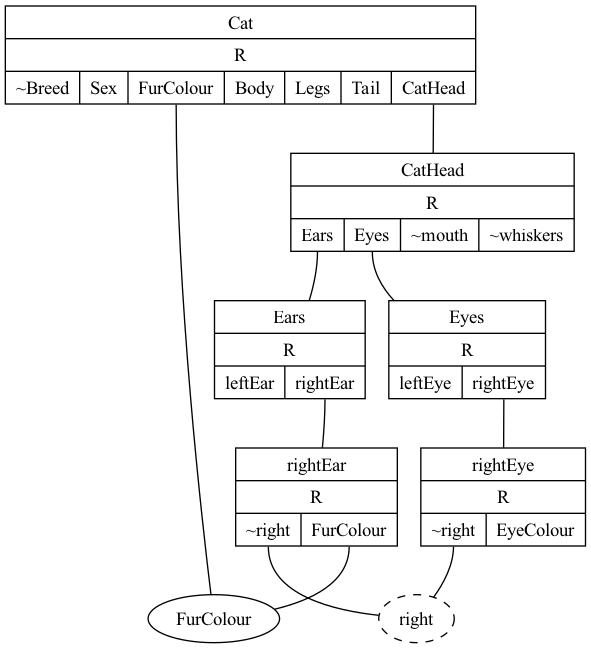

In [3]:
find = get_space(cat_hn, True, False, "Cat", "rightEye", "rightEar")

if find:
    print(find)

draw_hn(find, fname=pictures_dir+"cat2", show_vertex=False, view=False)
Image(filename=pictures_dir+'cat2.png', width=500, height=500)

In [4]:
isA = what_is_it(cat_hn, True, "whiskers", "brown")
print(isA)

['Cat', 'CatHead']
